## Supplement 4: Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [23]:

train_dataset_pd = pd.read_csv("train-songs.csv")
train_X = train_dataset_pd[["danceability","key","loudness","acousticness","instrumentalness","liveness","valence","tempo"]].to_numpy()
train_y = train_dataset_pd["popular"].to_numpy()
train_y = train_y.reshape((len(train_y), 1))

mean = np.mean(train_X, axis=0)
std = np.std(train_X, axis=0)

train_X = (train_X - mean) / std

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def loss(X, y, w):
    return np.mean(-y * np.log(sigmoid(X @ w)) - (1 - y) * np.log(1 - sigmoid(X @ w)))

def loss_gradient(X, y, w):
    return np.mean((y - sigmoid( X @ w)) * X, axis=0).reshape((len(w), 1))

   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




Text(0, 0.5, 'Loss')

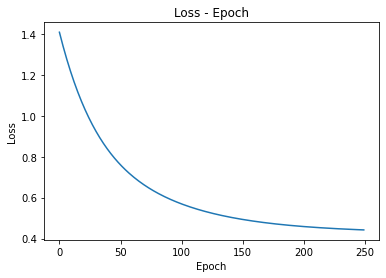

In [31]:
w = np.random.randn(len(train_X[0]), 1)
epochs = 250
learning_rate = 0.1
losses = np.zeros(epochs)

for i in range(epochs):
    losses[i] = loss(train_X, train_y, w)
    grad = loss_gradient(train_X, train_y, w)
    w += learning_rate * grad

plt.plot(losses)
plt.title("Loss - Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.